<a href="https://colab.research.google.com/github/gitclaudio23/Movie-Sentimen-Analyze_DataMining_SubProject/blob/main/Movie_Review_Analyze_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Langkah 1: Instalasi dan Import Library**

In [1]:
# Install libraries if not already installed (uncomment if needed)
# !pip install nltk scikit-learn matplotlib seaborn

# Import libraries
import nltk
from nltk.corpus import movie_reviews
import pandas as pd
import random
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK dataset
nltk.download('movie_reviews')


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

**Langkah 2: Persiapan Dataset**

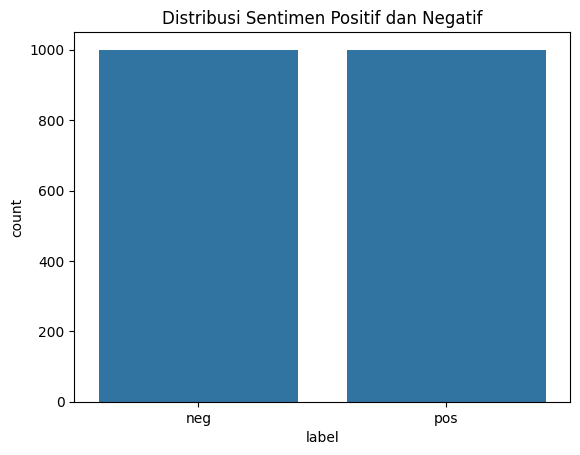

In [2]:
# Load dataset
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Shuffle dataset
random.shuffle(documents)

# Convert dataset to DataFrame for better visualization
data = pd.DataFrame({
    "text": [" ".join(words) for words, label in documents],
    "label": [label for _, label in documents]
})

# Visualize dataset distribution
sns.countplot(x='label', data=data)
plt.title("Distribusi Sentimen Positif dan Negatif")
plt.show()

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)


**Langkah 3: Text Vectorization**

In [3]:
# Text vectorization with TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Display some features
print("Contoh Fitur: ", vectorizer.get_feature_names_out()[:10])


Contoh Fitur:  ['000' '10' '100' '101' '11' '12' '13' '13th' '14' '15']


**Langkah 4: Hyperparameter Tuning**

In [5]:
# Define SVM model
svm_model = SVC()

# Define updated hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],        # Wider range of regularization parameters
    'kernel': ['linear', 'rbf'],    # Linear and RBF kernels
    'gamma': ['scale', 0.1, 1, 10]  # Gamma values including 'scale'
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train_vec, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   5.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   4.3s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   4.3s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   5.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   4.3s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   4.3s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   5.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   4.3s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   4.2s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   5.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   4.3s
[CV] END ....................C=0.1, gamma=0.1, 

**Langkah 5: Evaluasi Model**

In [6]:
# Train the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predictions on test data
y_pred = best_model.predict(X_test_vec)

# Evaluate model performance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[178  30]
 [ 16 176]]

Classification Report:
               precision    recall  f1-score   support

         neg       0.92      0.86      0.89       208
         pos       0.85      0.92      0.88       192

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.88       400
weighted avg       0.89      0.89      0.89       400


Test Accuracy: 0.885


**Langkah 6: Visualisasi Confusion Matrix**

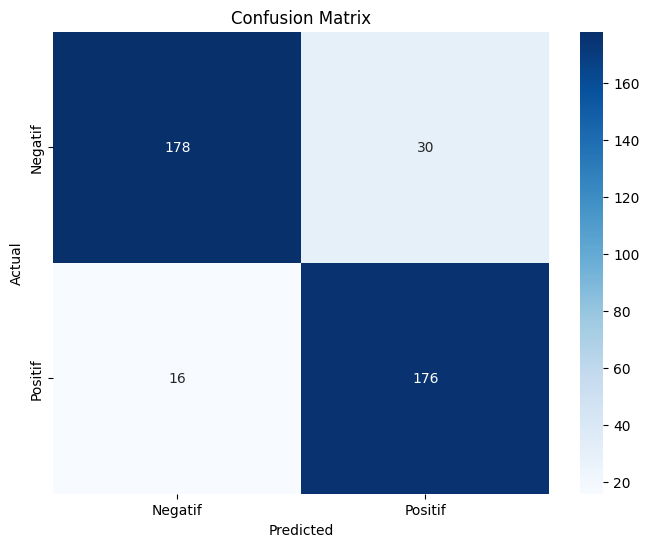

In [7]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Langkah 7: Visualisasi Performa Model**

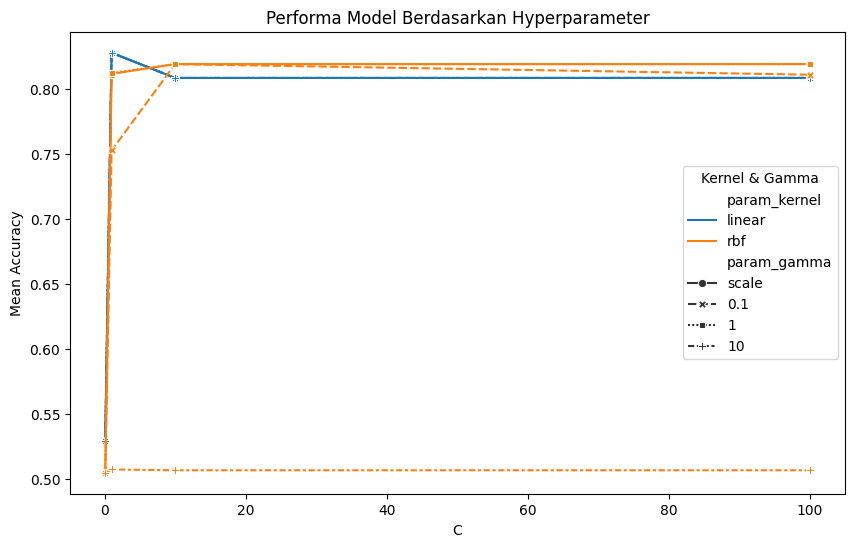

In [8]:
# Accuracy scores for each fold in GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(10, 6))
sns.lineplot(data=results, x='param_C', y='mean_test_score', hue='param_kernel', style='param_gamma', markers=True)
plt.title("Performa Model Berdasarkan Hyperparameter")
plt.xlabel("C")
plt.ylabel("Mean Accuracy")
plt.legend(title="Kernel & Gamma")
plt.show()


In [ ]:
print(data.head())

                                                text label
0  the most common ( and in many cases the only )...   pos
1  it was with great trepidation that i approache...   pos
2  i don ' t know how many other people have had ...   pos
3  much ado about nothing . ah , how sweet the ir...   neg
4  it may seem weird to begin a film about glam r...   pos


In [ ]:
data.to_csv('imdb_movie_reviews.csv', index=False)


In [20]:
# Function to predict sentiment of user input
def predict_sentiment():
    print("Masukkan ulasan panjang Anda:")
    user_input = input()  # Input long paragraph
    user_input_vec = vectorizer.transform([user_input])  # Vectorize input text
    prediction = best_model.predict(user_input_vec)  # Predict sentiment
    print(f"Hasil analisis: {'Positif' if prediction[0] == 'pos' else 'Negatif'}")

# Call function
predict_sentiment()

Masukkan ulasan panjang Anda:
the story need more improvement, and the action need more brutal i guess, but yeah i thinks need more touching
Hasil analisis: Negatif


In [21]:
import joblib

# Simpan model dan vectorizer
joblib.dump(best_model, 'sentiment_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']